In [1]:
from math import factorial, exp

def get_r(_alpha, _beta):
    eps = .00000001
    _r = 1
    while ((_alpha / _beta) ** _r / factorial(_r - 1)) * exp(_alpha / _beta) > eps:
        _r += 1
    return _r


def product(_k, _s, _beta):
    prod = 1
    for m in range(1, _s + 1):
        prod *= (_k + m * _beta)
    return prod


def get_p_0(_k, _alpha, _beta, _r):
    tmp1 = sum([_alpha ** n / factorial(n) for n in range(0, _k + 1)])
    tmp2 = _alpha ** _k / factorial(_k)
    tmp3 = sum([_alpha ** s / product(_k, s, _beta) for s in range(1, _r + 1)])
    res = 1 / (tmp1 + tmp2 * tmp3)
    return res

def get_p_ks(_k, _s, _alpha, _beta, _p_0):
    res = (_alpha ** (_k + _s)) / (factorial(_k) * product(_k, _s, _beta))
    return res * _p_0


nu = 0.5
lambd = 3.8
mu = 4
k = 2

alpha = lambd / mu
beta = nu / mu
r = get_r(alpha, beta)

# а) Вероятность того, что все бригады будут сидеть без дела из-за отсутствия овощей
p_0 = get_p_0(k, alpha, beta, r)
print("Вероятность того, что все бригады будут сидеть без дела из-за отсутствия овощей:", p_0)

# б) вероятность того, что привезенные овощи не будут своевременно обработаны
b = sum([s * get_p_ks(k, s, alpha, beta, p_0) for s in range(1, r + 1)])
p_otk = b * (beta / alpha)
print("вероятность того, что привезенные овощи не будут своевременно обработаны:", p_otk)

# в) Среднее число бригад, занятых обработкой овощей:
h = sum([n * (alpha ** n / factorial(n)) * p_0 for n in range(1, k + 1)]) + k * sum([get_p_ks(k, s, alpha, beta, p_0) for s in range(1, r + 1)])
print("Среднее число бригад, занятых обработкой овощей:", h)

# г) Долю бригад, простаивающих или занятых обработкой овощей
g = k - h
k_g = g / k
print("Доля простаивающих бригад:", k_g)
k_h = h / k
print("Доля занятых бригад:", k_h)


# д) Среднее число тонн овощей, обработанных за сутки, и среднее число тонн овощей, потерянных за сутки из-за их несвоевременной обработки
avg_served = lambd * (1 - p_otk)
print("среднее число тонн, обработанных за сутки:", avg_served)
avg_lost = lambd * p_otk
print("среднее число потерянных тонн:", avg_lost)

# е) Среднее число тонн овощей, ожидающих обработки: 
print("Среднее число тонн овощей, ожидающих обработки:", b)
    
# Определить необходимое число бригад, чтобы потери овощей были минимальны, а обработка их была наиболее экономичной
eff_crit = ((50000 / 31 * 2) + (10000 * avg_lost)) / avg_served
print(f"eff_crit = {eff_crit}")
while k != 10:
    k += 1
    b = sum([s * get_p_ks(k, s, alpha, beta, p_0) for s in range(1, r + 1)])
    p_otk = b * (beta / alpha)
    avg_served = lambd * (1 - p_otk)
    avg_lost = lambd * p_otk
    eff_crit = ((50000 / 31 * 2) + (10000 * avg_lost)) / avg_served
    print(f"eff_crit = {eff_crit} при {k} бригад")
    print(f"avg_served = {avg_served}, avg_lost = {avg_lost}")

Вероятность того, что все бригады будут сидеть без дела из-за отсутствия овощей: 0.36466259769893716
вероятность того, что привезенные овощи не будут своевременно обработаны: 0.027110171801962853
Среднее число бригад, занятых обработкой овощей: 0.9242453367881353
Доля простаивающих бригад: 0.5378773316059324
Доля занятых бригад: 0.4621226683940676
среднее число тонн, обработанных за сутки: 3.696981347152541
среднее число потерянных тонн: 0.10301865284745884
Среднее число тонн овощей, ожидающих обработки: 0.20603730569491768
eff_crit = 1151.207588149047
eff_crit = 893.4546421777978 при 3 бригад
avg_served = 3.784456612321389, avg_lost = 0.015543387678610443
eff_crit = 855.6033714285318 при 4 бригад
avg_served = 3.797652239222133, avg_lost = 0.0023477607778667007
eff_crit = 849.8209469758427 при 5 бригад
avg_served = 3.799676202315921, avg_lost = 0.00032379768407863864
eff_crit = 849.010853662895 при 6 бригад
avg_served = 3.799959923322784, avg_lost = 4.007667721622313e-05
eff_crit = 848

In [2]:
from math import factorial, exp

def product(_k, _s, _beta):
    prod = 1
    for m in range(1, _s + 1):
        prod *= (_k + m * _beta)
    return prod

def get_p_0(_k, _alpha, _beta, _B):
    tmp1 = sum([_alpha ** n / factorial(n) for n in range(0, _k + 1)])
    tmp2 = _alpha ** _k / factorial(_k)
    tmp3 = sum([_alpha ** s / product(_k, s, _beta) for s in range(1, _B + 1)])
    return 1 / (tmp1 + tmp2 * tmp3)

def get_p_n(_alpha, _n, _p_0):
    return (_alpha ** _n) / factorial(_n) * _p_0
def get_p_ks(_k, _s, _alpha, _beta, _p_0):
    res = (_alpha ** (_k + _s)) / (factorial(_k) * product(_k, _s, _beta))
    return res * _p_0

nu = 1
lambd = 20
mu = 2
k = 3
B = 4

alpha = lambd / mu
beta = nu / mu

# а) Вероятность того, что цеха рыболовецкого хозяйства простаивают
p_0 = get_p_0(k, alpha, beta, B)
print("Вероятность того, что цеха рыболовецкого хозяйства простаивают:", p_0)

# б) Вероятность того, что загружен только один цех рыболовецкого хозяйства
p_1 = get_p_n(alpha, 1, p_0)
print("Вероятность того, что загружен только один цех рыболовецкого хозяйства:", p_1)
      
# в) Процент и количество тонн (в среднем) выловленной рыбы, которую сможет самостоятельно обработать рыболовецкое хозяйство за сутки:
p_otk = (alpha - k + sum([(k - n) * get_p_n(alpha, n, p_0) for n in range(0, k + 1)])) / alpha
pr_served = (1 - p_otk) * 100
avg_served = (1 - p_otk) * lambd
print("Процент выловленной рыбы, которую сможет самостоятельно обработать рыболовецкое хозяйство за сутки:", pr_served)
print("Количество тонн (в среднем) выловленной рыбы, которую сможет самостоятельно обработать рыболовецкое хозяйство за сутки:", avg_served)

# г) Процент и количество тонн выловленной рыбы, которую необходимо перевезти на заводы переработки и копчения за сутки
pr_lost = p_otk * 100
avg_lost = p_otk * lambd
print("Процент выловленной рыбы, которую необходимо перевезти на заводы переработки и копчения за сутки:", pr_lost)
print("Количество тонн (в среднем) выловленной рыбы, которую необходимо перевезти на заводы переработки и копчения за сутки:", avg_lost)

# д) Количество тонн рыбы, которая находится в холодильнике и ожидает начала обработки
b = sum([s * get_p_ks(k, s, alpha, beta, p_0) for s in range(1, B + 1)])
print("Количество тонн рыбы, которая находится в холодильнике и ожидает начала обработки:", b)

# е) Количество тонн рыбы, которое необходимо в течение суток отправить на завод переработки рыбы
avg_recycle = get_p_ks(k, B, alpha, beta, p_0) * lambd
print("Количество тонн рыбы, которое необходимо в течение суток отправить на завод переработки рыбы:", avg_recycle)

# Определить, сколько в среднем надо выделить автомашин для перевозки рыбы
car_capacity_recycle = 5
car_capacity_smoke = 2.5
k_recycle = 1
k_smoke = 1
while (k_recycle * car_capacity_recycle) < avg_recycle:
    k_recycle += 1
while (k_smoke * car_capacity_smoke) < b:
     k_smoke += 1
print("Кол-во машин для перевозки на завод переработки: ", k_recycle)
print("Кол-во машин для перевозки на завод копчения: ", k_smoke)
print("Кол-во машин для перевозки всей рыбы: ", k_recycle + k_smoke)

Вероятность того, что цеха рыболовецкого хозяйства простаивают: 0.00010172069434868887
Вероятность того, что загружен только один цех рыболовецкого хозяйства: 0.0010172069434868885
Процент выловленной рыбы, которую сможет самостоятельно обработать рыболовецкое хозяйство за сутки: 29.925743893125457
Количество тонн (в среднем) выловленной рыбы, которую сможет самостоятельно обработать рыболовецкое хозяйство за сутки: 5.985148778625091
Процент выловленной рыбы, которую необходимо перевезти на заводы переработки и копчения за сутки: 70.07425610687454
Количество тонн (в среднем) выловленной рыбы, которую необходимо перевезти на заводы переработки и копчения за сутки: 14.014851221374908
Количество тонн рыбы, которая находится в холодильнике и ожидает начала обработки: 3.2507565813020145
Количество тонн рыбы, которое необходимо в течение суток отправить на завод переработки рыбы: 10.764094640072896
Кол-во машин для перевозки на завод переработки:  3
Кол-во машин для перевозки на завод копчен

Начальные условия
А) Cреднее время, требуемое для обстрела катера противника: 0.016666666666666666
Б) Вероятность обстрела катера противника: 0.967741935483871
В) Доля катеров, не подвергшихся обстрелу: 0.03225806451612903
Г) Вероятность поражения катера противника при условии, что он был обстрелян: 0.8538880645161291

Условия меняются:
А) Увеличивается интенсивность катеров
Доля потерянных катеров = 0.03225806451612903 при интенсивности поступления 2
Доля потерянных катеров = 0.047619047619047616 при интенсивности поступления 3
Доля потерянных катеров = 0.0625 при интенсивности поступления 4
Доля потерянных катеров = 0.07692307692307693 при интенсивности поступления 5
Доля потерянных катеров = 0.09090909090909091 при интенсивности поступления 6
Доля потерянных катеров = 0.1044776119402985 при интенсивности поступления 7
Доля потерянных катеров = 0.11764705882352941 при интенсивности поступления 8
Доля потерянных катеров = 0.13043478260869565 при интенсивности поступления 9
Доля потеря

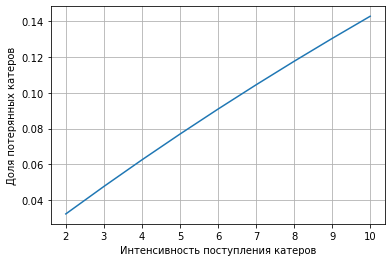

Б) Увеличивается количество средств обороны
Доля потерянных катеров = 0.03225806451612903 при 6 средств обороны
Доля потерянных катеров = 0.027777777777777776 при 7 средств обороны
Доля потерянных катеров = 0.024390243902439025 при 8 средств обороны
Доля потерянных катеров = 0.021739130434782608 при 9 средств обороны
Доля потерянных катеров = 0.0196078431372549 при 10 средств обороны
Доля потерянных катеров = 0.017857142857142856 при 11 средств обороны
Доля потерянных катеров = 0.01639344262295082 при 12 средств обороны


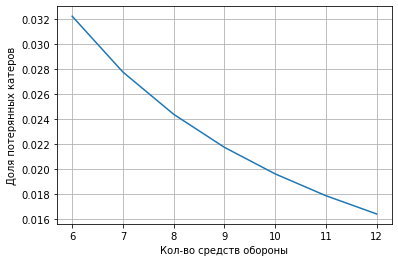

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 6
v = 0.1
p_destr = 0.3
lambd = 2

print("Начальные условия")
# А) Cреднее время, требуемое для обстрела катера противника:
mu = 1 / v
mu_sum = k * mu
avg_v = 1 / mu_sum
avg_mu = 1 / avg_v
print(f"А) Cреднее время, требуемое для обстрела катера противника: {avg_v}")

# Б) Вероятность обстрела катера противника:
p_shell = avg_mu/(lambd + avg_mu)
print(f"Б) Вероятность обстрела катера противника: {p_shell}")

# В) Доля катеров, не подвергшихся обстрелу:
unshelled_boats = lambd/(lambd + avg_mu) #доля необстр катеров
print(f"В) Доля катеров, не подвергшихся обстрелу: {unshelled_boats}")

# Г) Вероятность поражения катера противника при условии, что он был обстрелян:
p_shell_destr = (1 - ((1 - p_destr)**k)) * (1 - unshelled_boats) #вероятность поражения при обстреле
print(f'Г) Вероятность поражения катера противника при условии, что он был обстрелян: {p_shell_destr}')

# Изменение начальных условий

print("\nУсловия меняются:")
print("А) Увеличивается интенсивность катеров")
lambd_arr = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
unshelled_boats_arr_1 = np.zeros([len(lambd_arr)])
for i in range(len(lambd_arr)):
    unshelled_boats_arr_1[i] = lambd_arr[i]/(lambd_arr[i] + avg_mu)
    print(f"Доля потерянных катеров = {unshelled_boats_arr_1[i]} при интенсивности поступления {lambd_arr[i]}")
plt.plot(lambd_arr, unshelled_boats_arr_1)
plt.xlabel('Интенсивность поступления катеров')
plt.ylabel('Доля потерянных катеров')
plt.grid(True)
plt.show()

print("Б) Увеличивается количество средств обороны")
k_arr = np.array([6, 7, 8, 9, 10, 11, 12])
unshelled_boats_arr_2 = np.zeros([len(k_arr)])
for i in range(len(k_arr)):
    mu_sum = k_arr[i] * mu
    avg_v = 1 / mu_sum
    avg_mu = 1 / avg_v
    unshelled_boats_arr_2[i] = lambd/(lambd + avg_mu)
    print(f"Доля потерянных катеров = {unshelled_boats_arr_2[i]} при {k_arr[i]} средств обороны")
plt.plot(k_arr, unshelled_boats_arr_2)
plt.xlabel('Кол-во средств обороны')
plt.ylabel('Доля потерянных катеров')
plt.grid(True)
plt.show()   

In [ ]:
# M/M(k, k)/1
import matplotlib.pyplot as plt
from sympy import solve
from sympy.abc import x
k = 4
lambda_ = 1 / 4
mu = 1 / 9
ticket_price = 50
cost = 170
time = 9

psi = lambda_ / (k * mu)

def get_r(equation, pow):
    s = solve(equation)
    print(s)
    return s[0] if pow % 2 != 0 else s[1]

r = get_r(x + x ** 2 + x ** 3 + x ** 4 - (lambda_ / mu), k)

print(f'r = {r}')
print(f'Check: {lambda_ / mu} = {sum([r ** i for i in range(1, k + 1)])}')

def get_p_0(_r, _k):
    return (1 - _r) / _k

def get_p_q(_r, _k, _q):
    return (1 - _r ** (_q + 1)) / _k

def get_p_kn(_r, _psi, _n):
    return _psi * (1 - _r) * (_r ** _n)

# а) среднее время ожидания в очереди
p_0 = get_p_0(r, k)
tmp_1 = p_0 / (1 - r)
tmp_2 = (k * (k - 1)) / 2
tmp_3 = (r ** 2 * (k * r ** (k - 1) * (1 - r) - (1 - r ** k))) / ((1 - r) ** 2)
tmp_4 = p_0 * (1 - r ** k) / (1 - r)
tmp_5 = (r ** 2) / ((1 - r) ** 2)
b = tmp_1 * (tmp_2 + tmp_3) + tmp_4 * tmp_5
w = b / lambda_
print('A) Среднее время ожидания в очереди:', w)

# б) вероятность того, что аттракцион простаивает
p_empty = p_0 + sum([get_p_q(r, k, q) for q in range(1, k)])
print('Б) Вероятность того, что аттракцион простаивает:', p_empty)

# в) среднее число человек, ожидающих в очереди
print('В) Среднее число человек, ожидающих в очереди:', b)

# г) вероятность ожидания в очереди
p_wait_q = 1 - get_p_q(r, k, k - 1)
print('Г) Вероятность ожидания в очереди:', p_wait_q)

# д) долю времени, в течение которого аттракцион используется
p_use = 1 - p_empty
print('Д) Долю времени, в течение которого аттракцион используется:', p_use)

# е) средние значения выручки и прибыли от использования аттракциона
revenue = ticket_price * k * time * p_use * (60 / (1 / mu))
print('Е) Среднее значение выручки от использования аттракциона:', revenue)
profit = cost * time * p_use * (60 / (1 / mu))
print(' Среднее значение прибыли от использования аттракциона:', profit)

# Определить, как изменятся средняя прибыль и среднее время ожидания
# в очереди при различных значениях вместимости аттракциона –
# от 3 до 10 человек

k_s = list(range(3, 11))
income = []
w_s = []

equation = x + x ** 2 - (lambda_ / mu)

for k_tmp in k_s:
    equation += x ** k_tmp
    r = get_r(equation, k_tmp)
    print('r =', r, ':', equation, '\n')
    p_0 = get_p_0(r, k_tmp)
    tmp_1 = p_0 / (1 - r)
    tmp_2 = (k_tmp * (k_tmp - 1)) / 2
    tmp_3 = r ** 2 * (k_tmp * r ** (k_tmp - 1) * (1 - r) - (1 - r ** k_tmp)) / (1 - r) ** 2
    tmp_4 = p_0 * (1 - r ** k_tmp) / (1 - r)
    tmp_5 = (r ** 2) / ((1 - r) ** 2)
    
    b = tmp_1 * (tmp_2 + tmp_3) + tmp_4 * tmp_5
    
    w = b / lambda_
    w_s.append(w)
    
    p_empty = p_0 + sum([get_p_q(r, k_tmp, q) for q in range(1, k_tmp)])
    p_use = 1 - p_empty
    
    revenue = ticket_price * k_tmp * time * p_use * (60 / (1 / mu))
    profit = cost * time * p_use * (60 / (1 / mu))
    income.append(revenue - profit)
    
print(k_s)
print(income)
print(w_s)

plt.plot(k_s, income)
plt.title('Зависимость средней прибыли\nот вместимости аттракциона')
plt.xlabel('Вместимость аттракционов, чел.')
plt.ylabel('Средняя прибыль, ед.')
plt.show()
plt.plot(k_s, w_s)
plt.title('Зависимость среднего ожидания в очереди\nот вместимости аттракциона')
plt.xlabel('Вместимость аттракционов, чел')
plt.ylabel('t_wait, мин')
plt.show()

[-1.47802560945441, 0.782681205408285, -0.152327797976939 - 1.38628227420959*I, -0.152327797976939 + 1.38628227420959*I]
r = 0.782681205408285
Check: 2.25 = 2.25000000000000
A) Среднее время ожидания в очереди: 11.4061392734805
Б) Вероятность того, что аттракцион простаивает: 0.437500000000000
В) Среднее число человек, ожидающих в очереди: 2.85153481837013
Г) Вероятность ожидания в очереди: 0.843816586992054
Д) Долю времени, в течение которого аттракцион используется: 0.562500000000000
Е) Среднее значение выручки от использования аттракциона: 6750.00000000000
 Среднее значение прибыли от использования аттракциона: 5737.50000000000
[0.862898255460378, -0.931449127730189 - 1.31905048318387*I, -0.931449127730189 + 1.31905048318387*I]
r = 0.862898255460378 : x**3 + x**2 + x - 2.25 

[-1.47802560945441, 0.782681205408285, -0.152327797976939 - 1.38628227420959*I, -0.152327797976939 + 1.38628227420959*I]
r = 0.782681205408285 : x**4 + x**3 + x**2 + x - 2.25 

[0.744854285432345, -1.1335996647